In [2]:
import numpy as np
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import netCDF4



def in_range(x, xrange=[]):
    if (x >= xrange[0]) and (x <= xrange[1]):
        return True
    else:
        return False

In [3]:
grid_fn = "/ThomasEnvUSRA/USRA/VIIRS/VIIRS_Output/VIIRS_SNPP_Fire_375m_Gridded_v1.0_2018_01_03.nc"
point_fn = "/ThomasEnvUSRA/USRA/VIIRS/viirs-snpp_2018_United_States.csv"

f = netCDF4.Dataset(grid_fn)
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: VIIRS 375m Gridded Fire Data
    description: Gridded version of VIIRS 375m fire data. Data was downloaded from LANCE FIRMS archive download tool in shapefile format then gridded to a 375m grid with grid_VIIRS.py.
    version: v1.0
    institution: USRA
    technical_contact_email: aakbariasanjan@usra.edu
    ACQ_DATE: 3
    dataset_name: VIIRS_SNPP_Fire_375m_Gridded_v1.0_2018_01_03.nc
    wkt: GEOGCRS["WGS 84",DATUM["World Geodetic System 1984",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["unknown"],AREA["World"],BBOX[20,-135,50,-65]],ID["EPSG",4326]]
    dimensions(sizes): lat(13705), lon(28555)
    variables(d

In [4]:
ds = xr.open_dataset(grid_fn)
df = gpd.read_file(point_fn)
dff = df.loc[df["acq_date"]=="2018-01-03"]

In [5]:
dff

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,geometry
589,41.365479,-84.923531,323.99,0.48,0.64,2018-01-03,0638,N,VIIRS,n,1,254.34,3.55,N,2,None
590,41.452133,-81.678246,332.56,0.32,0.55,2018-01-03,0638,N,VIIRS,n,1,261.32,4.98,N,2,None
591,41.462097,-81.673134,348.37,0.32,0.55,2018-01-03,0638,N,VIIRS,n,1,260.57,4.36,N,2,None
592,33.005348,-79.878159,297.32,0.42,0.45,2018-01-03,0641,N,VIIRS,n,1,268.22,0.46,N,2,None
593,33.014652,-79.886032,320.58,0.42,0.45,2018-01-03,0641,N,VIIRS,n,1,270.28,2.21,N,2,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,19.376329,-155.065018,343.19,0.59,0.53,2018-01-03,2300,N,VIIRS,n,1,309.11,10.84,D,0,None
1152,19.405638,-155.281052,367,0.61,0.53,2018-01-03,2300,N,VIIRS,h,1,348.08,290.13,D,1,None
1153,19.377954,-155.081909,353.97,0.59,0.53,2018-01-03,2300,N,VIIRS,n,1,321.36,13.26,D,0,None
1154,19.351049,-155.041321,332.16,0.59,0.53,2018-01-03,2300,N,VIIRS,n,1,307.06,17.11,D,0,None


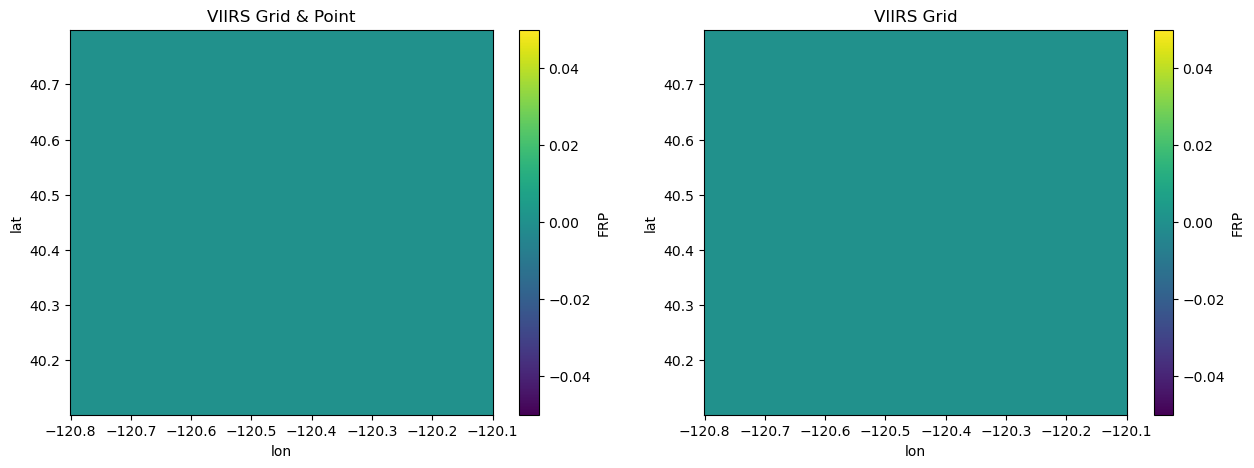

In [6]:
lat_range = [40.1, 40.8]
lon_range = [-120.8, -120.1]

dss = ds.sel(lat=slice(*lat_range[::-1]), lon=slice(*lon_range)).FRP > 0


lat, lon = [], []
for la, lo in zip(dff.latitude.to_list(), dff.longitude.to_list()):
    la, lo = float(la), float(lo)
    if in_range(la, lat_range) and in_range(lo, lon_range):
        lat.append(la)
        lon.append(lo)
    
plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 2, 1)
dss.plot(ax=ax)

plt.scatter(lon, lat, s=5, c='r')
ax.set_title("VIIRS Grid & Point")


ax = plt.subplot(1, 2, 2)
dss.plot(ax=ax)
ax.set_title("VIIRS Grid")

plt.show()

In [70]:
print(f"Number of VIIRS point in the selected window: {len(lat)}")
print(f"Number of VIIRS grids in the selected window: {dss.sum().values}")

Number of VIIRS point in the selected window: 0
Number of VIIRS grids in the selected window: 0


In [71]:
print(f"Number of VIIRS point in the entire frame: {len(dff)}")
print(f"Number of VIIRS grids in the entire frame: {(ds.FRP>0).sum().values}")

Number of VIIRS point in the entire frame: 388
Number of VIIRS grids in the entire frame: 2278


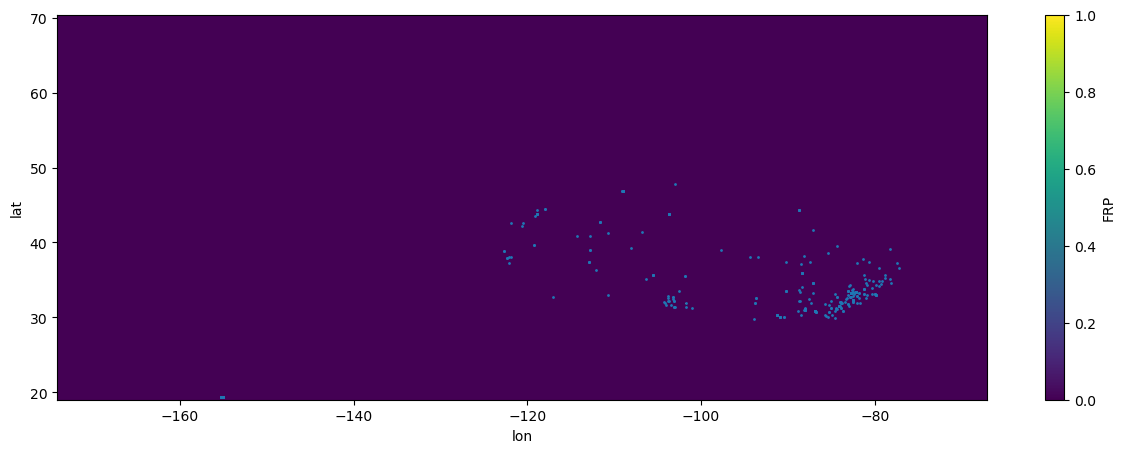

In [72]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 1, 1)
dss = ds.interp(lat=ds.lat[::4], lon=ds.lon[::4])
(dss.FRP>0).plot(ax=ax)

lat = [float(x) for x in dff.latitude.to_list()]
lon = [float(x) for x in dff.longitude.to_list()]
plt.scatter(lon, lat, s=1)
plt.show()

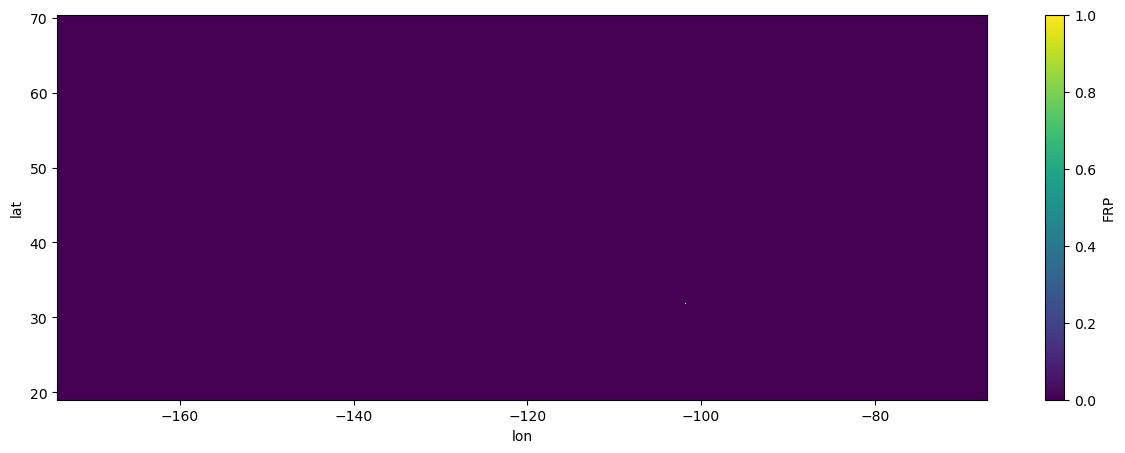

In [73]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 1, 1)
dss = ds.interp(lat=ds.lat[::4], lon=ds.lon[::4])
(dss.FRP>0).plot(ax=ax)

plt.show()